In [2]:
import pandas as pd # pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
# from sklearn import impute 
from  scipy.stats import skew, kurtosis, shapiro,zscore
import datetime


plt.rc('axes', linewidth=2)
plt.rc('axes', labelsize= 16)
plt.rc('axes',titlesize = 18)
plt.rc('legend',fontsize=14)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('figure',figsize=(10,8))

def figure_layout(figsize=(10,8),titel="",xlabel="",ylabel="",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16):
    plt.figure(figsize=figsize)
    ax1 = plt.gca()
    plt.rc('legend',fontsize=fontsize_legend)
    plt.title(titel, fontsize=fontsize_titel, fontweight = 'bold')
    plt.grid(True)
    plt.xlabel(xlabel, fontsize=fontsize_axis)
    plt.ylabel(ylabel, fontsize=fontsize_axis)
    for tick in ax1.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize_ticks)
    #         tick.label1.set_fontweight('bold')
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize_ticks)
    #     tick.label1.set_fontweight('bold')
    
    return ax1

fullYeardata = pd.read_csv("D:\Onedrive\Leuven\Final project\data\WrittenData\FullYeardata.csv",parse_dates=['date'], index_col='date') 
amount_measurements = fullYeardata.shape[0]
amount_meters = fullYeardata.shape[1]

In [3]:
# first with one meter.
fydc = fullYeardata.copy(deep=True)
# fydc["day"] = fydc.index.dayofyear
# fydc["month"] = fydc.index.month_name()
# fydc_day = fydc[fydc["day"] == 1]
# fydc_month = fydc[fydc["month"] == "January"]
# fydc_month["meter_2985"].plot()

Calculate the outliers

In [4]:
fydc_sum = fydc.sum(axis=0)
print("This is the mean %s and this is the std %s." % (fydc_sum.mean(),fydc_sum.std()))
fydc_sum

This is the mean 3155.0992814814763 and this is the std 1945.9616595007997.


meter_2979    4521.514
meter_2980    4018.233
meter_2981    4306.590
meter_2982    3599.984
meter_2983    2821.351
                ...   
meter_3244    1747.050
meter_3245    1867.938
meter_3246    1939.346
meter_3247    5113.478
meter_3248    4309.033
Length: 270, dtype: float64

In [9]:
zscoreArray = zscore(fydc_sum,nan_policy="omit")
print("The original amount of meters: %s" % len(zscoreArray))
# remove the meters that have an outlier consumption. (> 3xstd)
# Assume that the yearly consumption is a normal distributed.
fydc_new = fydc.loc[:,list(abs(zscoreArray) < 3)]
print("The new amount of meters after outlier removal: %s" % fydc_new.shape[1])


The original amount of meters: 270
The new amount of meters after outlier removal: 264


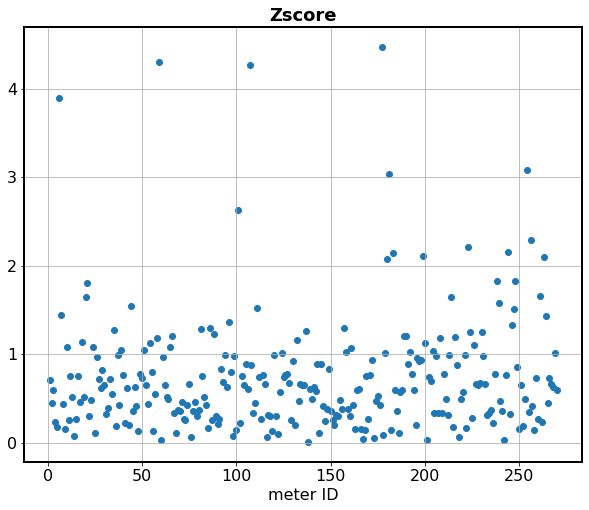

In [6]:
axes = figure_layout((10,8),"Zscore","meter ID","",18,16,14,16)
axes.scatter(np.arange(1,len(zscoreArray)+1), abs(zscoreArray))
# axes.legend(["Full dataset"])
plt.show()

Remove the days with only zero consumption.

In [12]:
fydc_new_daily = fydc_new.resample('D',axis=0).sum()
fydc_new_daily

,meter_2979,meter_2980,meter_2981,meter_2982,meter_2983,meter_2985,meter_2986,meter_2987,meter_2988,meter_2989,...,meter_3239,meter_3240,meter_3241,meter_3242,meter_3243,meter_3244,meter_3245,meter_3246,meter_3247,meter_3248
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,13.867,24.944,22.202,19.148,18.501,0.000,9.864,11.365,12.347,27.208,...,33.068,15.035,33.071,3.158,8.166,2.317,14.437,7.824,23.965,11.302
2017-01-02,13.879,25.137,24.188,16.356,19.164,0.310,9.923,9.245,14.113,26.849,...,36.394,14.989,28.413,3.145,13.519,2.301,16.274,7.517,28.689,14.178
2017-01-03,16.836,25.213,0.000,14.862,18.993,0.336,8.756,7.761,14.155,36.526,...,33.173,17.267,34.198,3.152,6.778,2.352,7.031,5.398,27.664,15.499
2017-01-04,12.996,22.225,22.385,11.487,15.975,0.179,7.054,8.939,15.487,29.207,...,33.808,17.712,34.620,3.151,7.476,2.516,17.018,6.788,29.229,11.853
2017-01-05,14.315,27.928,22.826,14.177,16.163,1.112,9.714,8.253,12.897,22.674,...,37.332,17.784,37.395,3.180,9.878,2.229,17.603,7.360,29.548,17.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2017-12-28,14.773,14.917,19.961,11.275,5.950,2.354,12.129,10.322,13.729,18.233,...,27.911,14.741,19.128,48.016,15.310,10.032,12.906,5.455,31.912,21.011
2017-12-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


The daily and weekly filter as described in 'Short term load forecasting with seasonal
decomposition using evolution for parameter tuning'. Missing days are ignored. The filters are applied on each individual time serie and then used as a template to fill in the missing values.
